In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/My\ Drive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os


In [ ]:
!pip install tensorflow  # Installs TensorFlow, which includes Keras
!pip install pydot  # For plotting model architecture
!apt-get install -qq graphviz  # Installs graphviz (required for model plotting)


In [ ]:


# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob


In [ ]:
train_path = "/content/DATASET/TRAIN/"
test_path = "/content/DATASET/TEST/"

In [ ]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 12565/12565 [00:07<00:00, 1634.39it/s]


In [ ]:
data.shape

(22564, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'R': 9999, 'O': 12565})

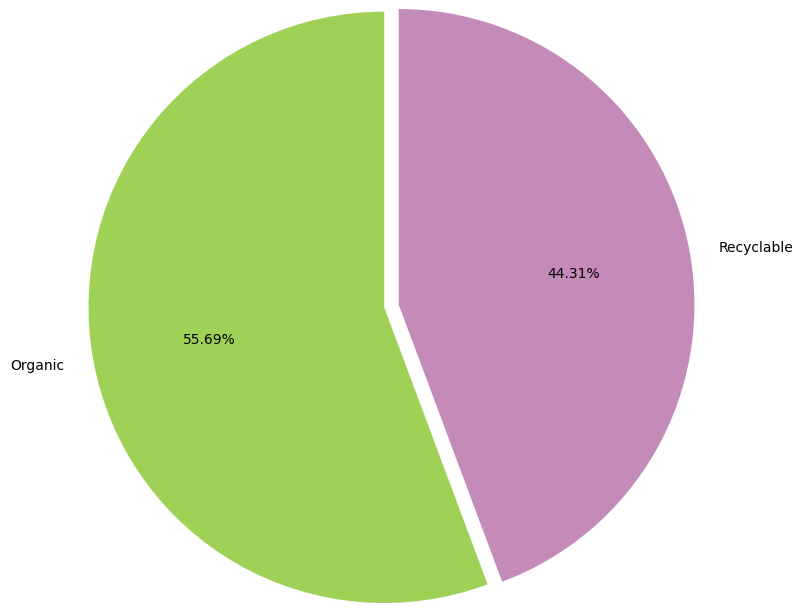

In [ ]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

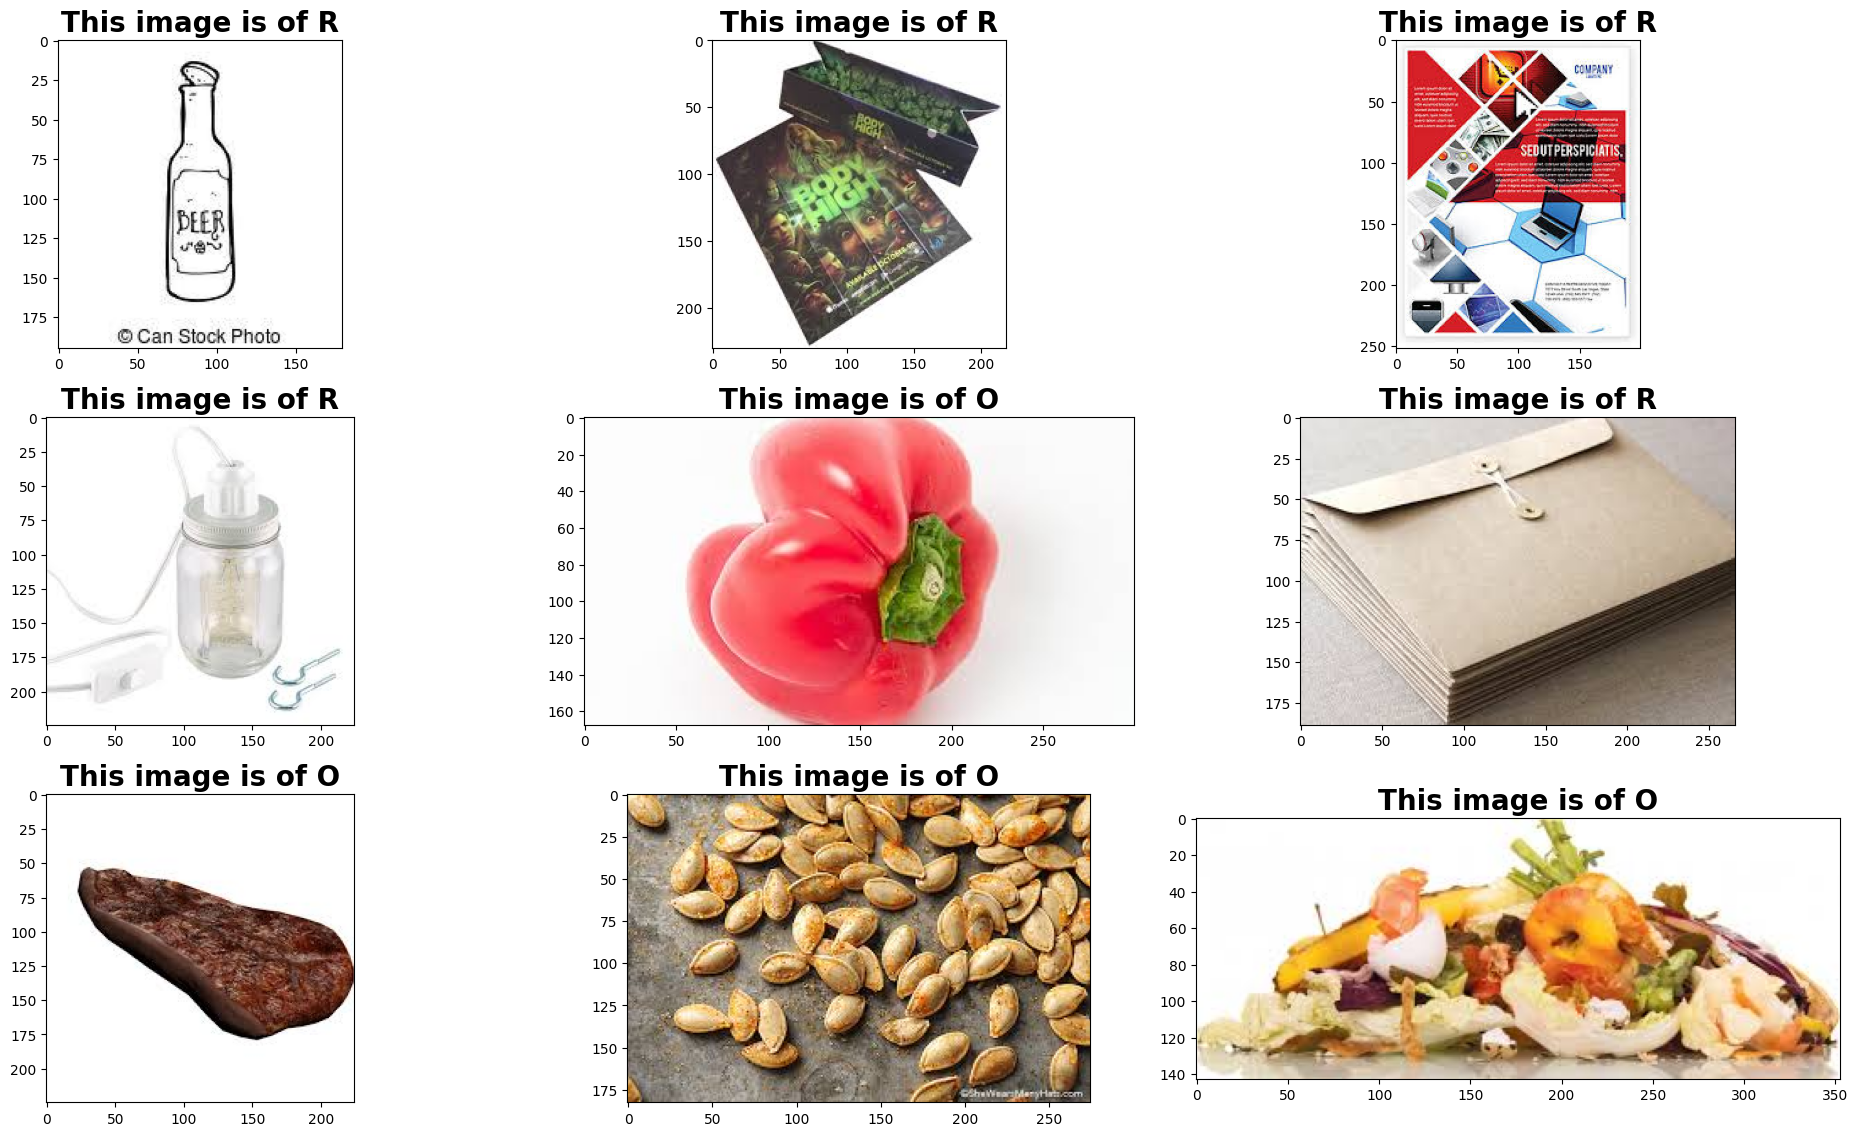

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

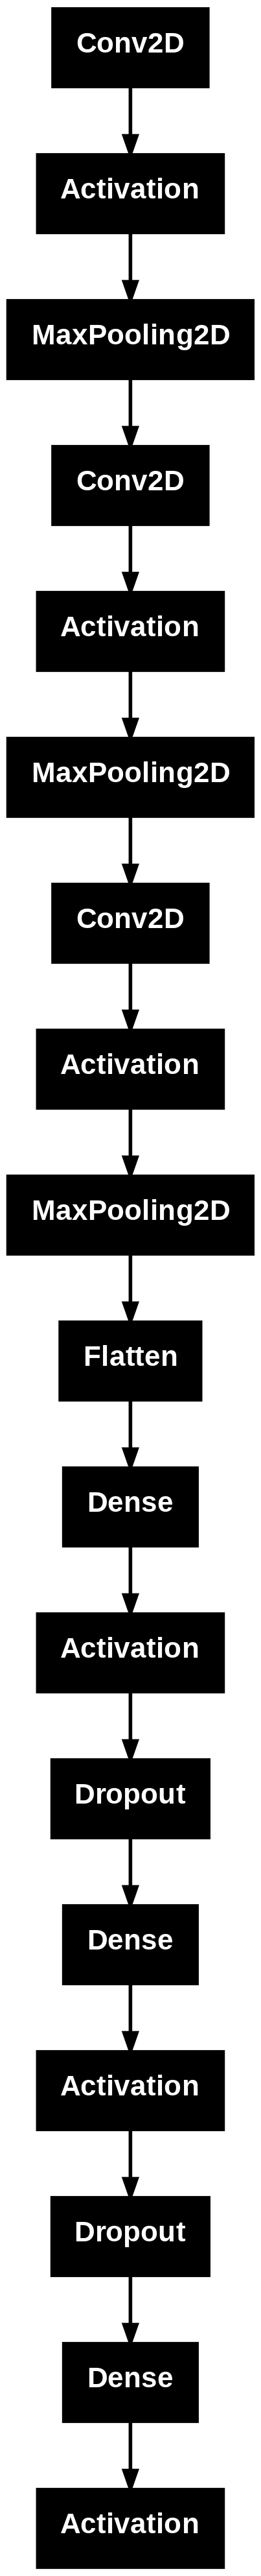

In [ ]:
plot_model(model)

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 65s 684ms/step - accuracy: 0.8674 - loss: 0.3262 - val_accuracy: 0.8902 - val_loss: 0.2926
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 65s 686ms/step - accuracy: 0.8915 - loss: 0.2745 - val_accuracy: 0.8814 - val_loss: 0.3418
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 60s 631ms/step - accuracy: 0.9016 - loss: 0.2500 - val_accuracy: 0.8957 - val_loss: 0.3053
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 83s 642ms/step - accuracy: 0.9185 - loss: 0.2131 - val_accuracy: 0.8711 - val_loss: 0.3937
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 80s 632ms/step - accuracy: 0.9338 - loss: 0.1808 - val_accuracy: 0.8886 - val_loss: 0.3391
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 84s 658ms/step - accuracy: 0.9516 - loss: 0.1364 - val_accuracy: 0.8766 - val_loss: 0.4215
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 81s 646ms/step - accuracy: 0.9623 - loss: 0.1108 - val_accuracy: 0.8922 - val_loss: 0.4186
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 82s 647ms/step - accuracy: 0.9713 - loss: 0.0849 - val_accu

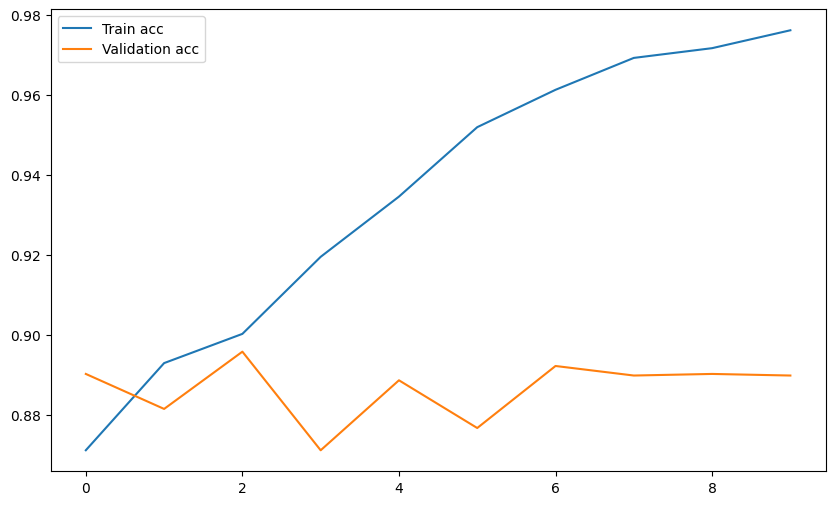

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

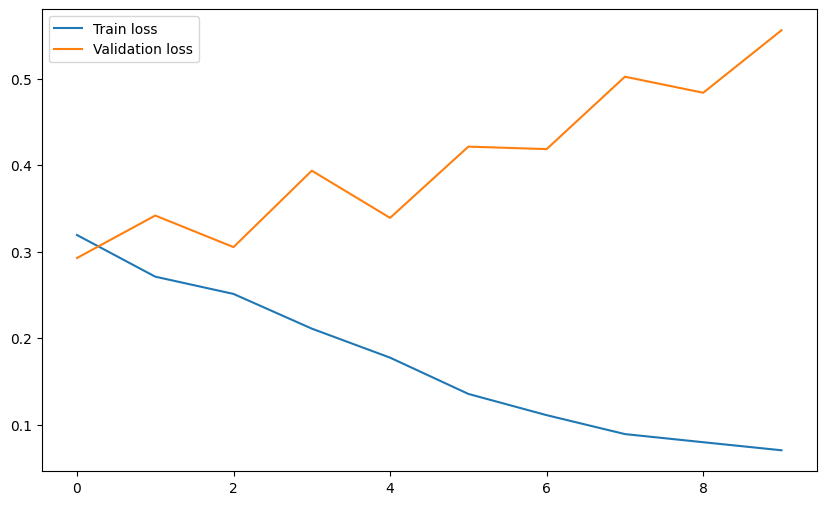

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [ ]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
This image -> Recyclable


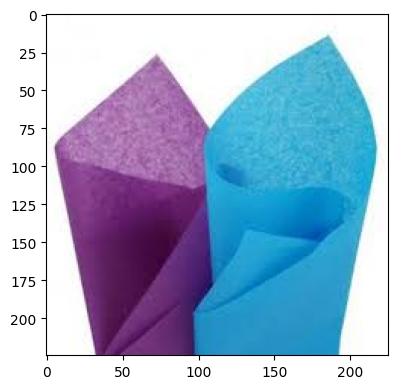

In [ ]:
test_img = cv2.imread("/content/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)

In [ ]:
import tensorflow as tf

# Assuming you have a trained TensorFlow/Keras model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmppw5mohe1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  137188036749520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188036750576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188035074656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188035076944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188035082224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188035082400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188035290288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188035293808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188035546800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188035549616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13718803555560

In [ ]:
# Apply quantization to make the model smaller
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_tflite_model = converter.convert()

# Save the quantized TensorFlow Lite model
with open('quantized_model.tflite', 'wb') as f:
    f.write(quantized_tflite_model)


Saved artifact at '/tmp/tmphkxz9phk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  137188036749520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188036750576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188035074656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188035076944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188035082224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188035082400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188035290288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188035293808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188035546800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137188035549616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13718803555560